Harsh Karia <br>
GitHub Username: harshkaria <br>
USC ID: 5860082592

References:
https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/#h2_6
https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 <br>
Office Hours
    

In [303]:
pip install bootstrapped

Note: you may need to restart the kernel to use updated packages.


In [302]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as spy
import statsmodels.api as sm
from scipy.stats import iqr
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LassoCV,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_selection import RFECV, RFE
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import copy
import os
import glob
import warnings

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

### 1c -- Feature Extraction

i. In classification, the time domain features usually used are: maximum, minimum, mean, median, std. deviation, 1st quartile, 3rd quartile, date, hour, lag correlation, rolling window/weighted average, expanding window

ii - extraction of features

In [4]:
new_dataset = {}

for i in range(1, 89):
    new_dataset[i] = {}

df_train_stats = []


In [5]:
def find_stats(df):
    t1_mean = df.loc[:, 'avg_rss12'].mean()
    t2_mean = df.loc[:, 'var_rss12'].mean()
    t3_mean = df.loc[:, 'avg_rss13'].mean()
    t4_mean = df.loc[:, 'var_rss13'].mean()
    t5_mean = df.loc[:, 'avg_rss23'].mean()
    t6_mean = df.loc[:, 'var_rss23'].mean()

    t1_median = df.loc[:, 'avg_rss12'].median()
    t2_median = df.loc[:, 'var_rss12'].median()
    t3_median = df.loc[:, 'avg_rss13'].median()
    t4_median = df.loc[:, 'var_rss13'].median()
    t5_median = df.loc[:, 'avg_rss23'].median()
    t6_median = df.loc[:, 'var_rss23'].median()

    t1_max = df.loc[:, 'avg_rss12'].max()
    t2_max = df.loc[:, 'var_rss12'].max()
    t3_max = df.loc[:, 'avg_rss13'].max()
    t4_max = df.loc[:, 'var_rss13'].max()
    t5_max = df.loc[:, 'avg_rss23'].max()
    t6_max = df.loc[:, 'var_rss23'].max()
    
    t1_min = df.loc[:, 'avg_rss12'].min()
    t2_min = df.loc[:, 'var_rss12'].min()
    t3_min = df.loc[:, 'avg_rss13'].min()
    t4_min = df.loc[:, 'var_rss13'].min()
    t5_min = df.loc[:, 'avg_rss23'].min()
    t6_min = df.loc[:, 'var_rss23'].min()
    
    t1_q1 = np.percentile(df.loc[:, 'avg_rss12'], 25)
    t2_q1 = np.percentile(df.loc[:, 'var_rss12'], 25)
    t3_q1 = np.percentile(df.loc[:, 'avg_rss13'], 25)
    t4_q1 = np.percentile(df.loc[:, 'var_rss13'], 25)
    t5_q1 = np.percentile(df.loc[:, 'avg_rss23'], 25)
    t6_q1 = np.percentile(df.loc[:, 'var_rss23'], 25)
    
    t1_q3 = np.percentile(df.loc[:, 'avg_rss12'], 75)
    t2_q3 = np.percentile(df.loc[:, 'var_rss12'], 75)
    t3_q3 = np.percentile(df.loc[:, 'avg_rss13'], 75)
    t4_q3 = np.percentile(df.loc[:, 'var_rss13'], 75)
    t5_q3 = np.percentile(df.loc[:, 'avg_rss23'], 75)
    t6_q3 = np.percentile(df.loc[:, 'var_rss23'], 75)
    
    t1_stddev = df.loc[:, 'avg_rss12'].std()
    t2_stddev = df.loc[:, 'var_rss12'].std()
    t3_stddev = df.loc[:, 'avg_rss13'].std()
    t4_stddev = df.loc[:, 'var_rss13'].std()
    t5_stddev = df.loc[:, 'avg_rss23'].std()
    t6_stddev = df.loc[:, 'var_rss23'].std()

    
    return (t1_mean, t2_mean, t3_mean, t4_mean, t5_mean, t6_mean, t1_median, t2_median, t3_median, t4_median, t5_median, t6_median, t1_max, t2_max, t3_max, t4_max, t5_max, t6_max, t1_min, t2_min, t3_min, t4_min, t5_min, t6_min, t1_q1, t2_q1, t3_q1, t4_q1, t5_q1, t6_q1, t1_q3, t2_q3, t3_q3, t4_q3, t5_q3, t6_q3, t1_stddev, t2_stddev, t3_stddev, t4_stddev, t5_stddev, t6_stddev) 

In [6]:
path = "../data/AReM/train/bending2/dataset4.csv"
features = ['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13','avg_rss23', 'var_rss23']
bending2_df = pd.DataFrame(columns=features)
bending2_df["label"] = "# Task: bending2"
bending2_df["filename"] = "bending2/dataset4"
bending2_df = pd.read_csv(path ,skiprows=5,delimiter=r"\s+",names=features)
t1_mean, t2_mean, t3_mean, t4_mean, t5_mean, t6_mean, t1_median, t2_median, t3_median, t4_median, t5_median, t6_median, t1_max, t2_max, t3_max, t4_max, t5_max, t6_max, t1_min, t2_min, t3_min, t4_min, t5_min, t6_min, t1_q1, t2_q1, t3_q1, t4_q1, t5_q1, t6_q1, t1_q3, t2_q3, t3_q3, t4_q3, t5_q3, t6_q3, t1_stddev, t2_stddev, t3_stddev, t4_stddev, t5_stddev, t6_stddev = find_stats(bending2_df)
new_dataset[88] = {
    "avg_rss12 min": t1_min,
    "var_rss12 min": t2_min,
    "avg_rss13 min": t3_min,
    "var_rss13 min": t4_min,
    "avg_rss23 min": t5_min,
    "var_rss23 min": t6_min,
    "avg_rss12 max": t1_max,
    "var_rss12 max": t2_max,
    "avg_rss13 max": t3_max,
    "var_rss13 max": t4_max,
    "avg_rss23 max": t5_max,
    "var_rss23 max": t6_max,
    "avg_rss12 mean": t1_mean,
    "var_rss12 mean": t2_mean,
    "avg_rss13 mean": t3_mean,
    "var_rss13 mean": t4_mean,
    "avg_rss23 mean": t5_mean,
    "var_rss23 mean": t6_mean,
    "avg_rss12 median": t1_median,
    "var_rss12 median": t2_median,
    "avg_rss13 median": t3_median,
    "var_rss13 median": t4_median,
    "avg_rss23 median": t5_median,
    "var_rss23 median": t6_median,
    "avg_rss12 q1": t1_q1,
    "var_rss12 q1": t2_q1,
    "avg_rss13 q1": t3_q1,
    "var_rss13 q1": t4_q1,
    "avg_rss23 q1": t5_q1,
    "var_rss23 q1": t6_q1,
    "avg_rss12 q3": t1_q3,
    "var_rss12 q3": t2_q3,
    "avg_rss13 q3": t3_q3,
    "var_rss13 q3": t4_q3,
    "avg_rss23 q3": t5_q3,
    "var_rss23 q3": t6_q3,
    "avg_rss12 stddev": t1_stddev,
    "var_rss12 stddev": t2_stddev,
    "avg_rss13 stddev": t3_stddev,
    "var_rss13 stddev": t4_stddev,
    "avg_rss23 stddev": t5_stddev,
    "var_rss23 stddev": t6_stddev
}
stat_bend2 = copy.deepcopy(new_dataset[88])
stat_bend2.update(label = "# Task: bending2")
df_train_stats.append(stat_bend2)

In [7]:
def load_datasets():
    path = os.getcwd() + '/../data/ArEM/**/**'
    files = glob.glob(os.path.join(path, "*.csv"), recursive=True)
    files_set = set()
    for f in files:
        files_set.add(f)
    files = set(files_set)
    df_train = []
    df_test = []
    i = 1
    for f in files:
        f_split = f.split('/')
        filename = f'{f_split[len(f_split) - 2]}/{f_split[len(f_split) - 1]}'
        if "train" in f:
            if "train/bending2/dataset4.csv" not in f:
                csv = pd.read_csv(f)
                label = csv.columns[0]
                csv.rename(columns={csv.columns[0]:'Time'}, inplace=True)
                csv["label"] = label
                csv["filename"] = filename
                t1_mean, t2_mean, t3_mean, t4_mean, t5_mean, t6_mean, t1_median, t2_median, t3_median, t4_median, t5_median, t6_median, t1_max, t2_max, t3_max, t4_max, t5_max, t6_max, t1_min, t2_min, t3_min, t4_min, t5_min, t6_min, t1_q1, t2_q1, t3_q1, t4_q1, t5_q1, t6_q1, t1_q3, t2_q3, t3_q3, t4_q3, t5_q3, t6_q3, t1_stddev, t2_stddev, t3_stddev, t4_stddev, t5_stddev, t6_stddev = find_stats(csv)
                new_dataset[i] = {
                    "avg_rss12 min": t1_min,
                    "var_rss12 min": t2_min,
                    "avg_rss13 min": t3_min,
                    "var_rss13 min": t4_min,
                    "avg_rss23 min": t5_min,
                    "var_rss23 min": t6_min,
                    "avg_rss12 max": t1_max,
                    "var_rss12 max": t2_max,
                    "avg_rss13 max": t3_max,
                    "var_rss13 max": t4_max,
                    "avg_rss23 max": t5_max,
                    "var_rss23 max": t6_max,
                    "avg_rss12 mean": t1_mean,
                    "var_rss12 mean": t2_mean,
                    "avg_rss13 mean": t3_mean,
                    "var_rss13 mean": t4_mean,
                    "avg_rss23 mean": t5_mean,
                    "var_rss23 mean": t6_mean,
                    "avg_rss12 median": t1_median,
                    "var_rss12 median": t2_median,
                    "avg_rss13 median": t3_median,
                    "var_rss13 median": t4_median,
                    "avg_rss23 median": t5_median,
                    "var_rss23 median": t6_median,
                    "avg_rss12 q1": t1_q1,
                    "var_rss12 q1": t2_q1,
                    "avg_rss13 q1": t3_q1,
                    "var_rss13 q1": t4_q1,
                    "avg_rss23 q1": t5_q1,
                    "var_rss23 q1": t6_q1,
                    "avg_rss12 q3": t1_q3,
                    "var_rss12 q3": t2_q3,
                    "avg_rss13 q3": t3_q3,
                    "var_rss13 q3": t4_q3,
                    "avg_rss23 q3": t5_q3,
                    "var_rss23 q3": t6_q3,
                    "avg_rss12 stddev": t1_stddev,
                    "var_rss12 stddev": t2_stddev,
                    "avg_rss13 stddev": t3_stddev,
                    "var_rss13 stddev": t4_stddev,
                    "avg_rss23 stddev": t5_stddev,
                    "var_rss23 stddev": t6_stddev
                }
                df_train.append(csv)
                stat = copy.deepcopy(new_dataset[i])
                stat.update(label = label)
                df_train_stats.append(stat)
        elif "test" in f:
            csv = pd.read_csv(f)
            label = csv.columns[0]
            csv["filename"] = filename
            csv.rename(columns={csv.columns[0]:'Time'}, inplace=True)
            t1_mean, t2_mean, t3_mean, t4_mean, t5_mean, t6_mean, t1_median, t2_median, t3_median, t4_median, t5_median, t6_median, t1_max, t2_max, t3_max, t4_max, t5_max, t6_max, t1_min, t2_min, t3_min, t4_min, t5_min, t6_min, t1_q1, t2_q1, t3_q1, t4_q1, t5_q1, t6_q1, t1_q3, t2_q3, t3_q3, t4_q3, t5_q3, t6_q3, t1_stddev, t2_stddev, t3_stddev, t4_stddev, t5_stddev, t6_stddev = find_stats(csv)
            new_dataset[i] = {
                    "avg_rss12 min": t1_min,
                    "var_rss12 min": t2_min,
                    "avg_rss13 min": t3_min,
                    "var_rss13 min": t4_min,
                    "avg_rss23 min": t5_min,
                    "var_rss23 min": t6_min,
                    "avg_rss12 max": t1_max,
                    "var_rss12 max": t2_max,
                    "avg_rss13 max": t3_max,
                    "var_rss13 max": t4_max,
                    "avg_rss23 max": t5_max,
                    "var_rss23 max": t6_max,
                    "avg_rss12 mean": t1_mean,
                    "var_rss12 mean": t2_mean,
                    "avg_rss13 mean": t3_mean,
                    "var_rss13 mean": t4_mean,
                    "avg_rss23 mean": t5_mean,
                    "var_rss23 mean": t6_mean,
                    "avg_rss12 median": t1_median,
                    "var_rss12 median": t2_median,
                    "avg_rss13 median": t3_median,
                    "var_rss13 median": t4_median,
                    "avg_rss23 median": t5_median,
                    "var_rss23 median": t6_median,
                    "avg_rss12 q1": t1_q1,
                    "var_rss12 q1": t2_q1,
                    "avg_rss13 q1": t3_q1,
                    "var_rss13 q1": t4_q1,
                    "avg_rss23 q1": t5_q1,
                    "var_rss23 q1": t6_q1,
                    "avg_rss12 q3": t1_q3,
                    "var_rss12 q3": t2_q3,
                    "avg_rss13 q3": t3_q3,
                    "var_rss13 q3": t4_q3,
                    "avg_rss23 q3": t5_q3,
                    "var_rss23 q3": t6_q3,
                    "avg_rss12 stddev": t1_stddev,
                    "var_rss12 stddev": t2_stddev,
                    "avg_rss13 stddev": t3_stddev,
                    "var_rss13 stddev": t4_stddev,
                    "avg_rss23 stddev": t5_stddev,
                    "var_rss23 stddev": t6_stddev
                }
            csv["label"] = label
            df_test.append(csv)
        i += 1
    df_train = pd.concat(df_train, axis=0)
    df_test  = pd.concat(df_test, axis=0)
    print(i)
    return df_train, df_test

In [8]:
def split_dataset_by_instance(df):
    instances = {}
    for label in df["filename"]:
        instances[label] = df.loc[df['filename'] == label]
    return instances

In [61]:
def split_dataset_by_label(df):
    instances = {}
    for label in df["label"]:
        instances[label] = df.loc[df['label'] == label]
    return instances

In [9]:
def split_dataset(instances, split_num):
    combined_stats = {}
    for instance in instances.keys():
        combined_stats[instance] = {}
        idx_int = 1
        splits = np.array_split(instances[instance], split_num)
        for split in splits:
            t1_mean, t2_mean, t3_mean, t4_mean, t5_mean, t6_mean, t1_median, t2_median, t3_median, t4_median, t5_median, t6_median, t1_max, t2_max, t3_max, t4_max, t5_max, t6_max, t1_min, t2_min, t3_min, t4_min, t5_min, t6_min, t1_q1, t2_q1, t3_q1, t4_q1, t5_q1, t6_q1, t1_q3, t2_q3, t3_q3, t4_q3, t5_q3, t6_q3, t1_stddev, t2_stddev, t3_stddev, t4_stddev, t5_stddev, t6_stddev = find_stats(split)
            idx = str(idx_int)
            combined_stats[instance].update({
                    'label': instance,
                    'avg_rss12 min' + ' split ' + idx: t1_min,
                    "var_rss12 min" + ' split ' + idx: t2_min,
                    "avg_rss13 min" + ' split ' + idx: t3_min,
                    "var_rss13 min" + ' split ' + idx: t4_min,
                    "avg_rss23 min" + ' split ' + idx: t5_min,
                    "var_rss23 min" + ' split ' + idx: t6_min,
                    "avg_rss12 max" + ' split ' + idx: t1_max,
                    "var_rss12 max" + ' split ' + idx: t2_max,
                    "avg_rss13 max" + ' split ' + idx: t3_max,
                    "var_rss13 max" + ' split ' + idx: t4_max,
                    "avg_rss23 max" + ' split ' + idx: t5_max,
                    "var_rss23 max" + ' split ' + idx: t6_max,
                    "avg_rss12 mean" + ' split ' + idx: t1_mean,
                    "var_rss12 mean" + ' split ' + idx: t2_mean,
                    "avg_rss13 mean" + ' split ' + idx: t3_mean,
                    "var_rss13 mean" + ' split ' + idx: t4_mean,
                    "avg_rss23 mean" + ' split ' + idx: t5_mean,
                    "var_rss23 mean" + ' split ' + idx: t6_mean,
                    "avg_rss12 median" + ' split ' + idx: t1_median,
                    "var_rss12 median" + ' split ' + idx: t2_median,
                    "avg_rss13 median" + ' split ' + idx: t3_median,
                    "var_rss13 median" + ' split ' + idx: t4_median,
                    "avg_rss23 median" + ' split ' + idx: t5_median,
                    "var_rss23 median" + ' split ' + idx: t6_median,
                    "avg_rss12 q1" + ' split ' + idx: t1_q1,
                    "var_rss12 q1" + ' split ' + idx: t2_q1,
                    "avg_rss13 q1" + ' split ' + idx: t3_q1,
                    "var_rss13 q1" + ' split ' + idx: t4_q1,
                    "avg_rss23 q1" + ' split ' + idx: t5_q1,
                    "var_rss23 q1" + ' split ' + idx: t6_q1,
                    "avg_rss12 q3" + ' split ' + idx: t1_q3,
                    "var_rss12 q3" + ' split ' + idx: t2_q3,
                    "avg_rss13 q3" + ' split ' + idx: t3_q3,
                    "var_rss13 q3" + ' split ' + idx: t4_q3,
                    "avg_rss23 q3" + ' split ' + idx: t5_q3,
                    "var_rss23 q3" + ' split ' + idx: t6_q3,
                    "avg_rss12 stddev" + ' split ' + idx: t1_stddev,
                    "var_rss12 stddev" + ' split ' + idx: t2_stddev,
                    "avg_rss13 stddev" + ' split ' + idx: t3_stddev,
                    "var_rss13 stddev" + ' split ' + idx: t4_stddev,
                    "avg_rss23 stddev" + ' split ' + idx: t5_stddev,
                    "var_rss23 stddev" + ' split ' + idx: t6_stddev
                })
            idx_int += 1
    return combined_stats
    

In [10]:
df_train, df_test = load_datasets()
df_train.append(bending2_df)
print(df_train.shape)
print(df_train)
df = pd.concat([df_train, df_test], axis=0)

df_stats = pd.DataFrame(new_dataset).T
display(df_stats)
print(df)

89
(32639, 9)
       Time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      32.00       4.85      17.50       3.35      22.50       3.20   
1       250      40.50       1.12      14.00       2.24      21.75       1.30   
2       500      40.50       2.60      11.33       4.50      18.25       5.31   
3       750      34.50       1.50      20.67       2.87      19.00       2.83   
4      1000      34.50       1.50      21.25       3.27      18.25       4.38   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      39.50       0.50       8.25       0.83      13.25       0.83   
476  119000      39.67       0.47       6.00       0.00      13.50       0.50   
477  119250      39.50       0.50       7.60       0.49      13.50       1.12   
478  119500      39.50       0.50       8.33       0.47      14.33       0.47   
479  119750      39.50       0.50       8.50       0.50      14.50       0.50   

             

,avg_rss12 min,var_rss12 min,avg_rss13 min,var_rss13 min,avg_rss23 min,var_rss23 min,avg_rss12 max,var_rss12 max,avg_rss13 max,var_rss13 max,...,avg_rss13 q3,var_rss13 q3,avg_rss23 q3,var_rss23 q3,avg_rss12 stddev,var_rss12 stddev,avg_rss13 stddev,var_rss13 stddev,avg_rss23 stddev,var_rss23 stddev
1,24.25,0.0,5.5,0.0,7.00,0.0,45.00,8.58,26.75,8.05,...,19.00,3.9175,21.7500,3.9000,3.581301,1.601799,3.430906,1.600137,2.890347,1.852600
2,39.50,0.0,0.0,0.0,1.00,0.0,45.00,1.09,21.80,7.31,...,14.75,0.9550,17.2500,1.2200,1.122245,0.295805,4.539665,1.072168,4.847545,0.882784
3,15.00,0.0,5.0,0.0,7.00,0.0,46.75,13.44,25.25,8.58,...,17.33,4.0900,18.5000,4.2400,5.315110,2.480206,3.101017,1.688745,3.155015,1.630983
4,24.75,0.0,1.0,0.0,0.00,0.0,48.33,3.11,16.50,5.91,...,7.50,0.7100,5.5425,0.9400,7.495615,0.346756,1.936492,0.749945,3.274539,0.675781
5,30.00,0.0,3.0,0.0,1.00,0.0,46.67,2.95,21.25,7.50,...,19.75,0.5000,14.2500,1.1200,2.395338,0.413719,2.850422,0.687213,3.141679,0.709638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,23.33,0.0,7.0,0.0,7.67,0.0,43.50,9.71,28.50,9.78,...,21.00,4.2400,21.0000,4.6175,3.822016,2.092002,4.021629,1.810499,3.617702,1.963685
85,39.00,0.0,0.0,0.0,0.00,0.0,41.00,1.00,15.00,2.49,...,12.00,0.5000,9.3300,0.8300,0.280158,0.194585,2.469508,0.409145,4.097351,0.608399
86,27.50,0.0,1.5,0.0,0.00,0.0,50.75,6.06,23.25,6.02,...,18.00,0.8700,20.7500,1.0900,3.642901,0.488937,3.926922,0.708297,4.978530,0.750636
87,42.00,0.0,0.0,0.0,1.00,0.0,45.00,1.12,23.00,5.45,...,20.00,0.7100,19.0000,1.0900,0.891818,0.260357,3.898006,0.763926,4.112285,0.764801


       Time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      32.00       4.85      17.50       3.35      22.50       3.20   
1       250      40.50       1.12      14.00       2.24      21.75       1.30   
2       500      40.50       2.60      11.33       4.50      18.25       5.31   
3       750      34.50       1.50      20.67       2.87      19.00       2.83   
4      1000      34.50       1.50      21.25       3.27      18.25       4.38   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      38.00       2.55      18.25       2.17      20.00       4.74   
476  119000      36.00       0.00      19.00       1.41      13.67       1.25   
477  119250      37.00       1.73      17.75       0.43      22.50       0.87   
478  119500      37.00       3.74      19.00       4.18      22.00       1.41   
479  119750      38.75       1.92      16.75       3.49      21.00       3.67   

               label       

### CIII - standard deviation

In [11]:
features = df_stats.columns
std_devs = {}

for f in features[:-1]:
    std_devs[f] = df_stats.loc[:, f].std()
    
    

df_f_std = pd.DataFrame.from_dict([std_devs]).T
df_f_std.rename(columns={0:'Std Dev'}, inplace=True)
df_f_std

,Std Dev
avg_rss12 min,9.624011
var_rss12 min,0.000000
avg_rss13 min,2.954516
var_rss13 min,0.000000
avg_rss23 min,6.121205
var_rss23 min,0.046101
avg_rss12 max,4.207745
var_rss12 max,5.059656
avg_rss13 max,4.819848
var_rss13 max,2.181809


### Bootstrapped Estimation of Standard Deviation

In [12]:
conf_int_and_sdev = {}

for i in range(0, len(df_stats.columns) - 1):
    f = df_stats.columns[i]
    datum = {}
    samples = np.array(df_stats[f])
    samples = np.where(np.isnan(samples), 0, samples)
    bootstrapped_std_dev = bs.bootstrap(samples, stat_func=bs_stats.std, alpha = 0.1)
    datum['std_dev'] = std_devs[f]
    datum['lower_bound'] = bootstrapped_std_dev.lower_bound
    datum['upper_bound'] = bootstrapped_std_dev.upper_bound
    conf_int_and_sdev[f] = datum

df_conf = pd.DataFrame(conf_int_and_sdev).T
df_conf

,std_dev,lower_bound,upper_bound
avg_rss12 min,9.624011,8.715583,11.434061
var_rss12 min,0.000000,0.000000,0.000000
avg_rss13 min,2.954516,2.790966,3.135568
var_rss13 min,0.000000,0.000000,0.000000
avg_rss23 min,6.121205,4.666465,7.823413
var_rss23 min,0.046101,0.013125,0.091154
avg_rss12 max,4.207745,3.520069,9.305270
var_rss12 max,5.059656,4.707994,5.475981
avg_rss13 max,4.819848,4.370647,6.387356
var_rss13 max,2.181809,2.040956,2.532729


### 1 IV - Most important features

The most important features are the mean, standard deviation, and median. These features give us a glimpse of the data at its center, and allow us to derive insight accordingly

### 2 - ISLR 3.7.4

2. a. If the true relationship is linear, then we would expect the cubic RSS for the linear regression to be smaller than the linear RSS. A cubic RSS would make for a better fit against the training data. This is because cubic functions have more flexibility. <br>
b. The test RSS for the linear relationship would also be lower than the cubic relationship. Since the true relationship is linear, the cubic function would have a higher bias and thus a low variance to the actual data. <br>
c. We would expect the cubic relationship to be a better representation/fit over the training data if the true relationship between and X and Y is nonlinear, for the same reasons described above -- cubic functions allow for a tighter fit and lower MSE. <br>
d. It depends. The test set would also have a lower RSS if the true relationship is non linear. A cubic/polynomial function has curvature, and thus represents a nonlinear relationship closer than a truly linear one and may result in higher variance. <br>


## 4 - Part 2: Time Series Classification

In [13]:
def plot_scatter_plot(df):
    sns.pairplot(df)
    plt.show()

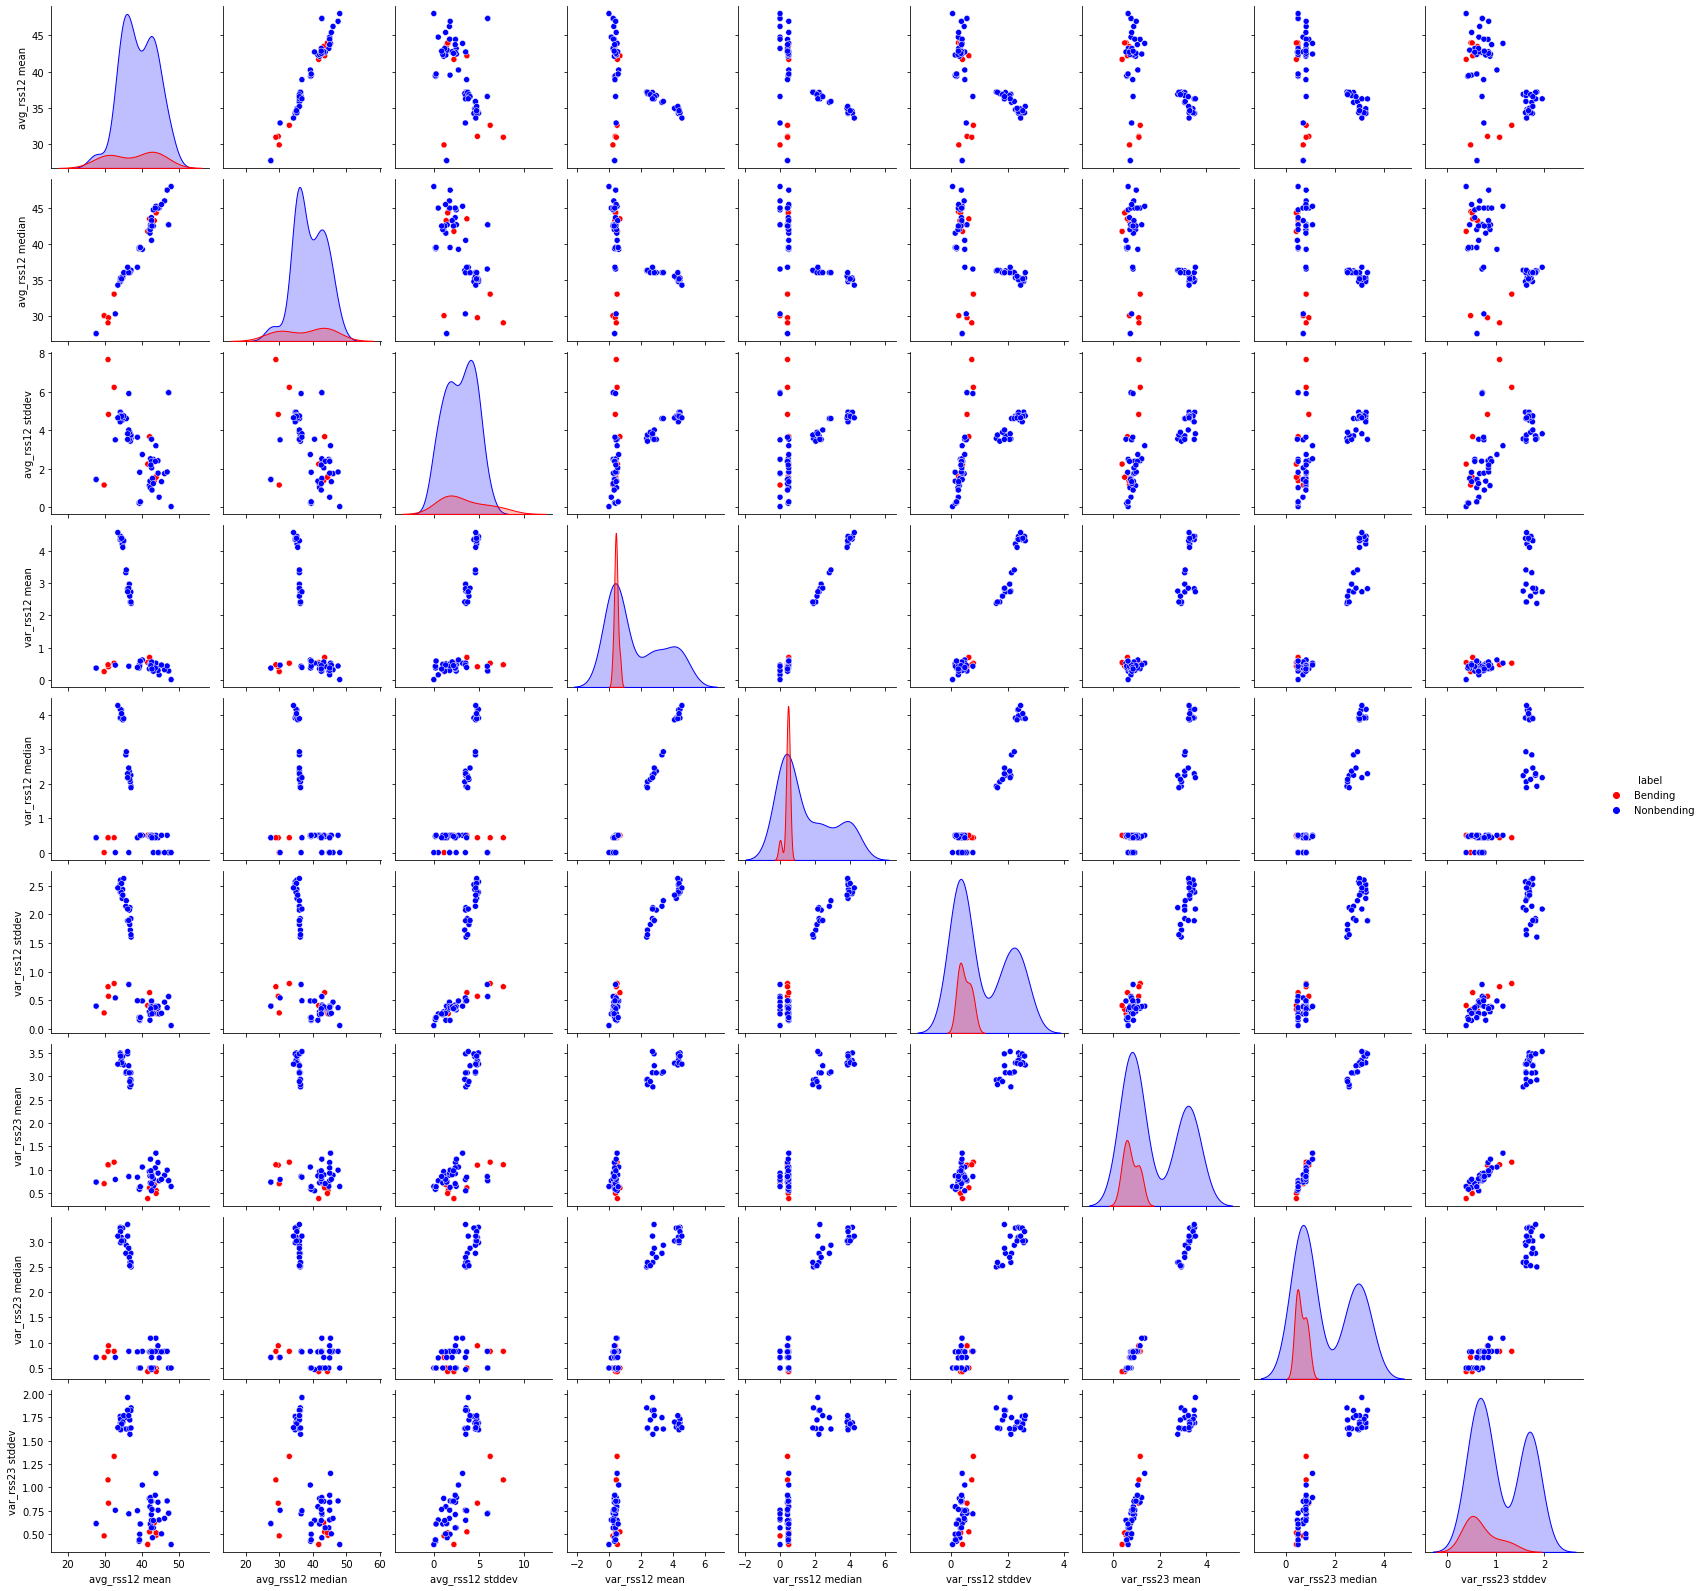

In [14]:
cols = ["avg_rss12", "var_rss12", "var_rss23"]
# print("Plotting Scatter Plot")
# sns.pairplot(data=df_stats)
# print("Plotted Scatter Plot")
# plt.show()

df_sp_1 = {}
df_sp_2 = {}


df_train_stats_transformed = pd.DataFrame(df_train_stats)

#print(df_train_stats_transformed)


# Get Mean, Standard Deviation, and Median for the three features above from the training df
# mean_avg_rss12, mean_var_rss12, mean_var_rss23, class
# med_avg_rss12, med_var_rss12, med_var_rss23, class
# stddev_avg_rss12, stddev_var_rss12, stddev_var_rss23, class
# SELECT * FROM COL WHERE class == x, class != x

bending_df = df_train_stats_transformed[df_train_stats_transformed['label'].str.contains('bending')]


nonbending_df = df_train_stats_transformed[df_train_stats_transformed['label'].str.contains('bending') == False]


# PLOT AVG_RSS12 MEAN, MED, STD DEV

# ROW: Each DP
# COL = Each COL

for col in cols:
    df_sp_1[f'{col} mean'] = bending_df[f'{col} mean']
    df_sp_1[f'{col} median'] = bending_df[f'{col} median']
    df_sp_1[f'{col} stddev'] = bending_df[f'{col} stddev']
    df_sp_1['label'] = 'Bending'


for col in cols:
    df_sp_2[f'{col} mean'] = nonbending_df[f'{col} mean']
    df_sp_2[f'{col} median'] = nonbending_df[f'{col} median']
    df_sp_2[f'{col} stddev'] = nonbending_df[f'{col} stddev']
    df_sp_2['label'] = 'Nonbending'


df_sp_1 = pd.DataFrame(df_sp_1)
df_sp_2 = pd.DataFrame(df_sp_2)

df_sp = pd.concat([df_sp_1, df_sp_2], axis=0)
df_sp = pd.DataFrame(df_sp)
(df_sp)


sns.pairplot(data=df_sp, hue='label', palette={'Bending':'red','Nonbending':'blue'})




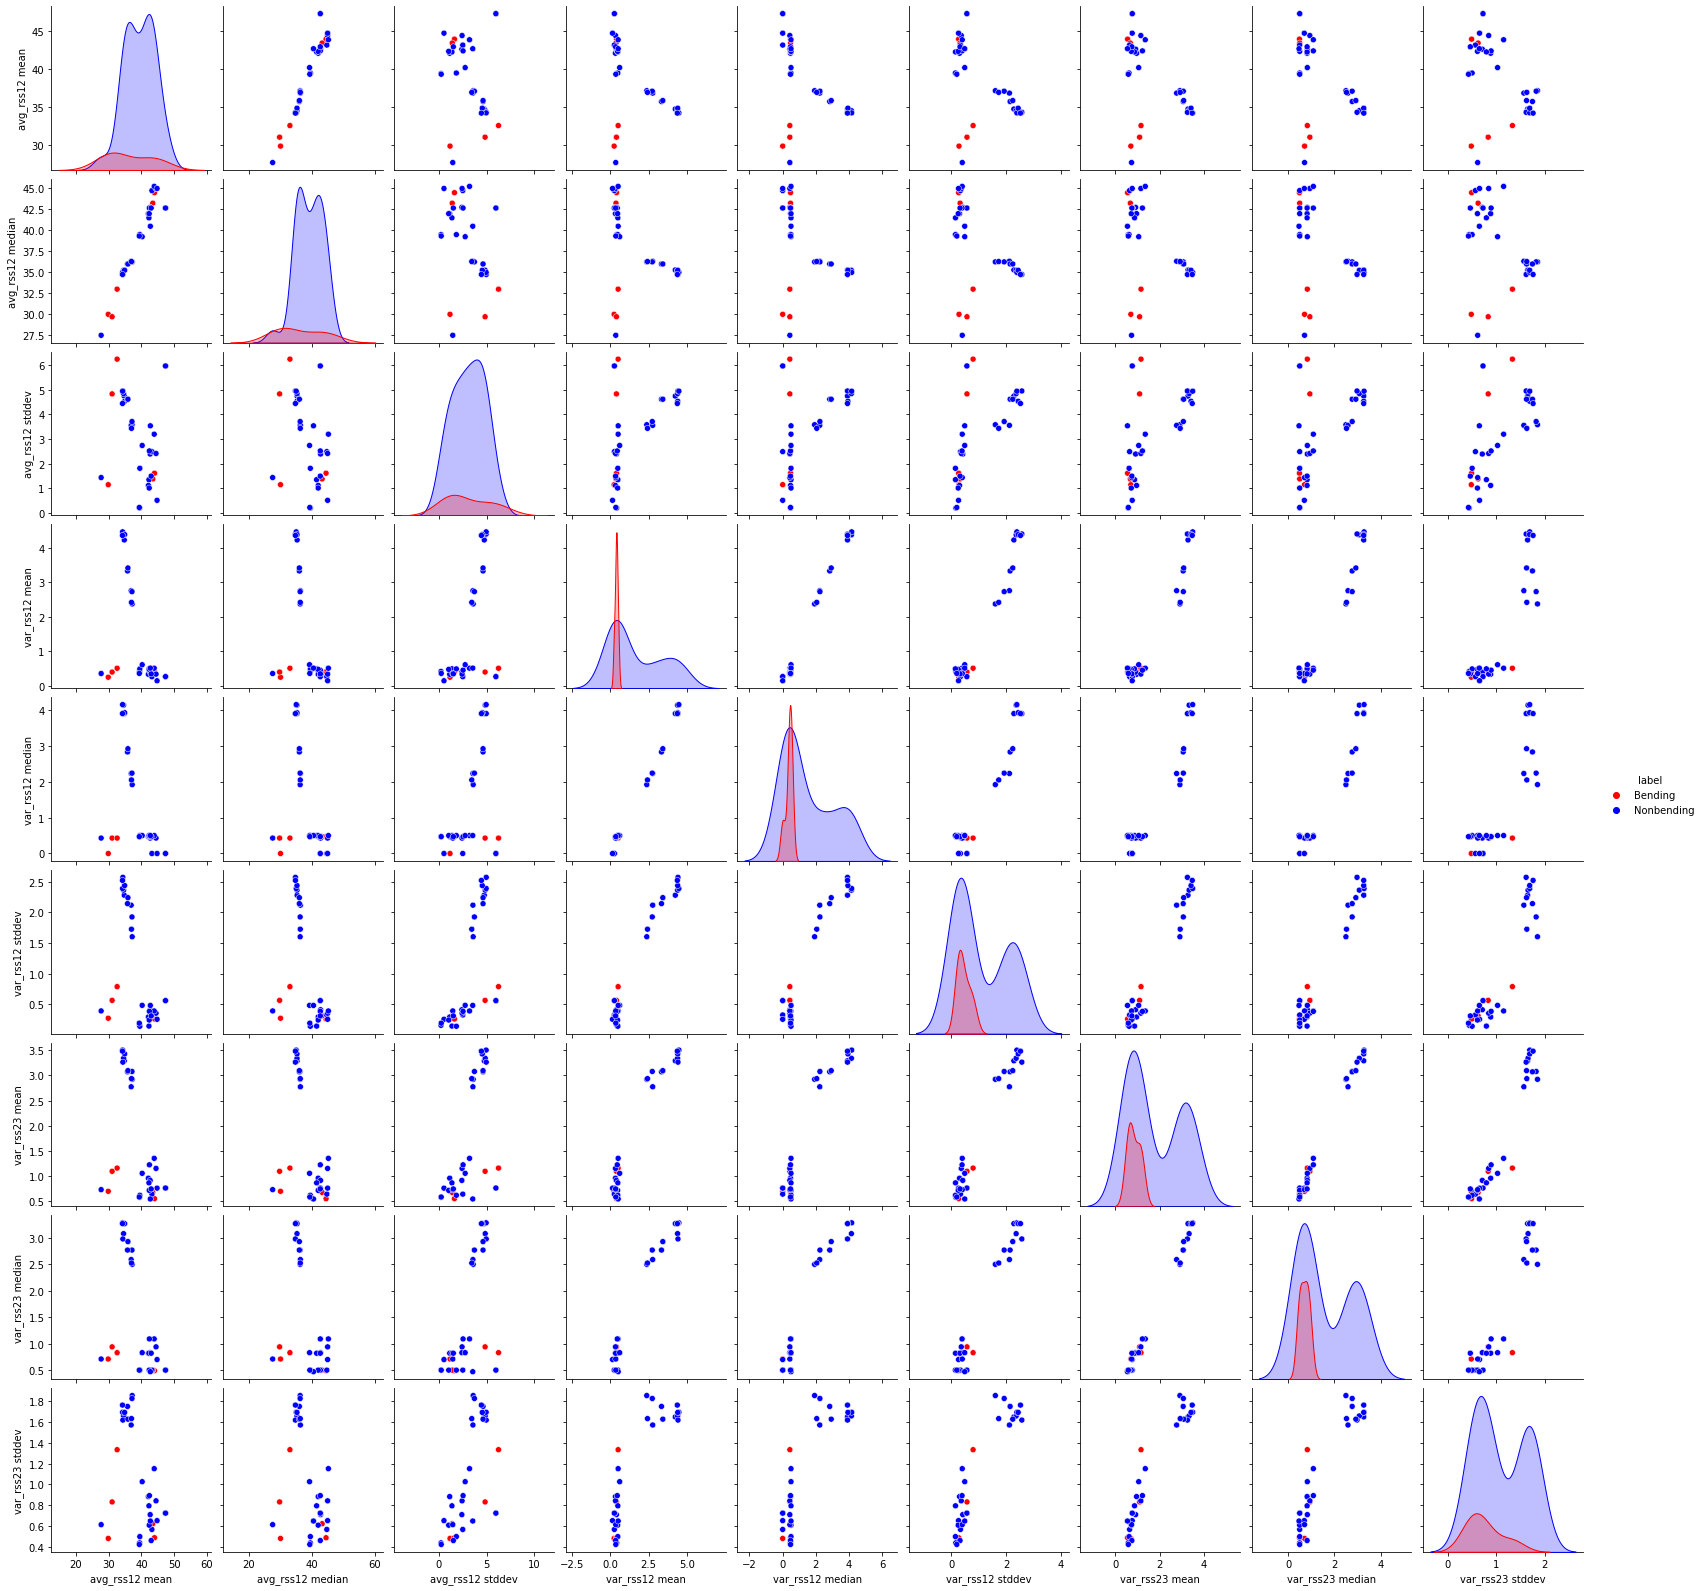

In [15]:
bending_df_split_half = np.array_split(bending_df, 2)
nonbending_df_split_half = np.array_split(nonbending_df, 2)
instance_list = []
df_half_sp_1 = {}
df_half_sp_1['label'] = 'Bending'
df_half_sp_2 = {}
df_half_sp_2['label'] = 'Nonbending'
for df in bending_df_split_half:
    for col in cols:
        if(f'{col} mean' not in df_half_sp_1):
            df_half_sp_1[f'{col} mean'] = df[f'{col} mean']
        else:
            df_half_sp_1[f'{col} mean'].append(df[f'{col} mean'])
        if(f'{col} median' not in df_half_sp_1):
            df_half_sp_1[f'{col} median'] = df[f'{col} median']
        else:
            df_half_sp_1[f'{col} median'].append(df[f'{col} median'])
        if(f'{col} stddev' not in df_half_sp_1):
            df_half_sp_1[f'{col} stddev'] = df[f'{col} stddev']
        else:
            df_half_sp_1[f'{col} stddev'].append(df[f'{col} stddev'])


for df in nonbending_df_split_half:
    for col in cols:
        if(f'{col} mean' not in df_half_sp_2):
            df_half_sp_2[f'{col} mean'] = df[f'{col} mean']
        else:
            df_half_sp_2[f'{col} mean'].append(df[f'{col} mean'])
        if(f'{col} median' not in df_half_sp_2):
            df_half_sp_2[f'{col} median'] = df[f'{col} median']
        else:
            df_half_sp_2[f'{col} median'].append(df[f'{col} median'])
        if(f'{col} stddev' not in df_half_sp_2):
            df_half_sp_2[f'{col} stddev'] = df[f'{col} stddev']
        else:
            df_half_sp_2[f'{col} stddev'].append(df[f'{col} stddev'])


df_sp_h_1 = pd.DataFrame(df_half_sp_1)
df_sp_h_2 = pd.DataFrame(df_half_sp_2)

df_sp_h = pd.concat([df_sp_h_1, df_sp_h_2], axis=0)



sns.pairplot(data=df_sp_h, hue='label', palette={'Bending':'red','Nonbending':'blue'})


In [16]:
instances = split_dataset_by_instance(df_train)

In [101]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score = 0
max_l = 0
n_features = 0
best_features = None

selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = []
    for n, row in y_labels.iteritems():
        if "bending" in row:
            y_labels.at[n] = int(1)
            y_train.append(1)
        else:
            y_labels.at[n] = int(0)
            y_train.append(0)
    y_train = pd.to_numeric(y_train)
    logistic_regression = LogisticRegression(solver='liblinear')
    for j in range(1, len(x_train.columns)):
        rfe_res = RFE(estimator=logistic_regression, n_features_to_select=j)
        rfe_res.fit(x_train, y_train)
        cv_score = cross_val_score(rfe_res, x_train, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_score)
        if mean_score > max_cv_score:
            max_cv_score = mean_score
            n_features = j
            max_l = i
            best_features = x_train.columns[rfe_res.support_]
print(f'The best value for L is {max_l}')
print(f'The best cross validation score is {max_cv_score}')
print(f'Optimal # of features: {n_features}')
print(f'Optimal Features: {best_features}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
The best value for L is 6
The best cross validation score is 0.9714285714285715
Optimal # of features: 8
Optimal Features: Index(['avg_rss23 mean split 1', 'avg_rss23 mean split 2',
       'var_rss23 mean split 2', 'avg_rss12 mean split 5',
       'var_rss12 mean split 5', 'avg_rss12 median split 4',
       'avg_rss12 stddev split 2', 'avg_rss12 stddev split 4'],
      dtype='object')


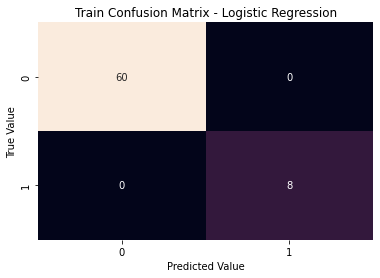

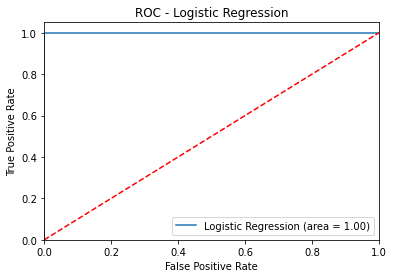

In [102]:
chunked_training = split_dataset(instances, max_l)
train_df_chunked = pd.DataFrame(chunked_training).T
x_train = train_df_chunked.iloc[:,1:]
y_labels = train_df_chunked.iloc[:, 0]
y_train = []
x_train = x_train[best_features]
for n, row in y_labels.iteritems():
    if "bending" in row:
        y_labels.at[n] = int(1)
        y_train.append(1)
    else:
        y_labels.at[n] = int(0)
        y_train.append(0)
y_train = pd.to_numeric(y_train)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_train)

conf_mat = confusion_matrix(y_train, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_train, y_pred)
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



### 4iv. Parameters and p-value

In [103]:
logit_model = sm.Logit(y_train,x_train.astype(float))
result = logit_model.fit(maxiter = 20)
result.summary()

         Current function value: 0.000000
         Iterations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            7
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                   1.000
Time:                        17:33:53   Log-Likelihood:            -2.4022e-07
converged:                      False   LL-Null:                       -24.630
Covariance Type:            nonrobust   LLR p-value:                 2.017e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
avg_rss23 mean split 1       3.4180   1819.286      0.002      0.999   -3562.317    3569.153
avg_rss23 mean split 2       3.7972   2550.754      0.001      0.999   -4995.589    5003.184
var_rss23 mean split 2     -18.2354   1.46e+04     -0.001      0.999   -2.87e+04    2.87e+04
avg_rss12 mean split 5       1.7305   2591.358      0.001      0.999   -5077.239    5080.700
var_rss12 mean split 5      16.0162   9867.759      0.002      0.999   -1.93e+04    1.94e+04
avg_rss12 median split 4    -4.7805   2406.071     -0.002      0.998   -4720.594    4711.033
avg_rss12 stddev split 2    -2.6784   5275.009     -0.001      1.000   -1.03e+04    1.03e+04
avg_rss12 stddev split 4    -6.8781   3064.884     -0.002      0.998   -6013.941    6000.185
============================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

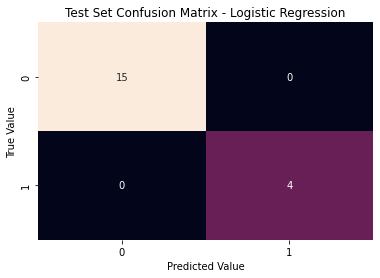

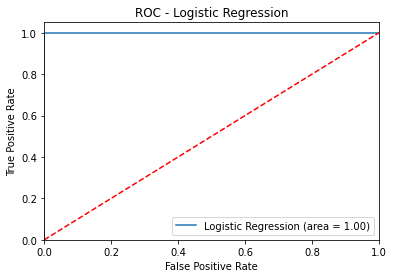

In [104]:
test_instances = split_dataset_by_instance(df_test)

chunked_test = split_dataset(test_instances, max_l)
test_df_chunked = pd.DataFrame(chunked_test).T
x_test = test_df_chunked.iloc[:,1:]
y_labels_test = test_df_chunked.iloc[:, 0]
y_test = []
x_test = x_test[best_features]
for n, row in y_labels_test.iteritems():
    if "bending" in row:
        y_labels_test.at[n] = int(1)
        y_test.append(1)
    else:
        y_labels_test.at[n] = int(0)
        y_test.append(0)
y_test = pd.to_numeric(y_test)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_test, y_test)
y_pred_test = logistic_regression.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred_test)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Set Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



In [20]:
logit_model = sm.Logit(y_test,x_test.astype(float))
result = logit_model.fit(maxiter = 15)
result.summary()

         Current function value: 0.000000
         Iterations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                   1.000
Time:                        20:37:22   Log-Likelihood:            -4.6574e-06
converged:                      False   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                  0.006611
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
avg_rss23 mean split 1      -2.8430    907.183     -0.003      0.997   -1780.890    1775.204
avg_rss23 mean split 2       4.7451    874.997      0.005      0.996   -1710.217    1719.707
var_rss23 mean split 2      -7.7576   2647.895     -0.003      0.998   -5197.537    5182.022
avg_rss12 mean split 5      -0.5077    819.104     -0.001      1.000   -1605.922    1604.906
var_rss12 mean split 5      -2.5573   5464.305     -0.000      1.000   -1.07e+04    1.07e+04
avg_rss12 median split 4    -0.8030    809.546     -0.001      0.999   -1587.485    1585.879
avg_rss12 stddev split 2     0.2256   3563.441   6.33e-05      1.000   -6983.991    6984.442
avg_rss12 stddev split 4     6.2170   1077.203      0.006      0.995   -2105.061    2117.495
============================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

## 4v Results
The accuracy on the test set is better than the cross validation accuracy provided in the training. 

## 4vi 
The classes are not well seperated. This does cause instability when calculating logistic regression parametes

## 4vii 
There are imbalanced classes as described by the confusion matrices. Model based on case-control cross-sampling:

In [108]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score_cc = 0
max_l_cc = 0
n_features_cc = 0
best_features_cc = None

selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = []
    for n, row in y_labels.iteritems():
        if "bending" in row:
            y_labels.at[n] = int(1)
            y_train.append(1)
        else:
            y_labels.at[n] = int(0)
            y_train.append(0)
    y_train = pd.to_numeric(y_train)
    
    random_sampler = RandomUnderSampler()
    x_sample_train, y_sample_train = random_sampler.fit_resample(x_train, y_train)
    
    logistic_regression = LogisticRegression(solver='liblinear')
    logistic_regression.fit(x_sample_train, y_sample_train)
    for j in range(1, len(x_sample_train.columns)):
        rfe_res = RFE(estimator=logistic_regression, n_features_to_select=j)
        rfe_res.fit(x_train, y_train)
        cv_score = cross_val_score(rfe_res, x_sample_train, y_sample_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_score)
        if mean_score > max_cv_score_cc:
            max_cv_score_cc = mean_score
            n_features_cc = j
            max_l_cc = i
            best_features_cc = x_train.columns[rfe_res.support_]
#             print(f'At {i}')
#             print(f'The curr value for L is {max_l_cc}')
#             print(f'The curr cross validation score is {max_cv_score_cc}')
#             print(f'Curr # of features: {n_features_cc}')
#             print(f'Curr Features: {best_features_cc}')
print('#### CASE CONTROL SAMPLING ####')
print(f'The best value for L is {max_l_cc}')
print(f'The best cross validation score is {max_cv_score_cc}')
print(f'Optimal # of features: {n_features_cc}')
print(f'Optimal Features: {best_features_cc}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
#### CASE CONTROL SAMPLING ####
The best value for L is 1
The best cross validation score is 1.0
Optimal # of features: 10
Optimal Features: Index(['var_rss12 mean split 1', 'avg_rss13 mean split 1',
       'avg_rss23 mean split 1', 'var_rss23 mean split 1',
       'avg_rss12 median split 1', 'avg_rss13 median split 1',
       'var_rss13 median split 1', 'var_rss23 median split 1',
       'avg_rss13 stddev split 1', 'avg_rss23 stddev split 1'],
      dtype='object')


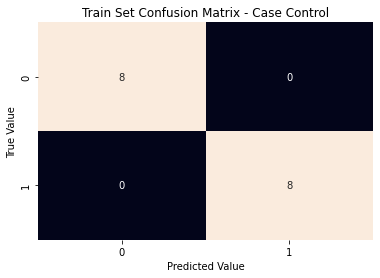

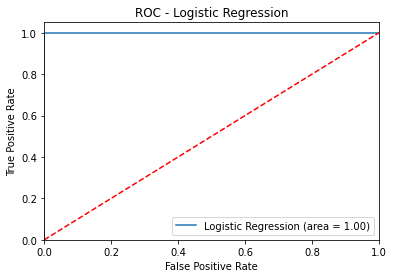

In [119]:
chunked_train_cc = split_dataset(instances, max_l_cc)
train_df_chunked_cc = pd.DataFrame(chunked_train_cc).T
x_train_cc = train_df_chunked_cc.iloc[:,1:]
y_labels_train_cc = train_df_chunked_cc.iloc[:, 0]
y_train_cc = []
x_train_cc = x_train_cc[best_features_cc]
for n, row in y_labels_train_cc.iteritems():
    if "bending" in row:
        y_labels_train_cc.at[n] = int(1)
        y_train_cc.append(1)
    else:
        y_labels_train_cc.at[n] = int(0)
        y_train_cc.append(0)
y_train_cc = pd.to_numeric(y_train_cc)

random_sampler = RandomUnderSampler()
x_sample_train_cc, y_sample_train_cc = random_sampler.fit_resample(x_train_cc, y_train_cc)
logistic_regression.fit(x_sample_train_cc, y_sample_train_cc)

y_pred_im_cc = logistic_regression.predict(x_sample_train_cc)

conf_mat = confusion_matrix(y_sample_train_cc, y_pred_im_cc)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Set Confusion Matrix - Case Control')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_sample_train_cc, y_pred_im_cc)
fp_rate, tp_rate, thresholds = roc_curve(y_sample_train_cc, y_pred_im_cc)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

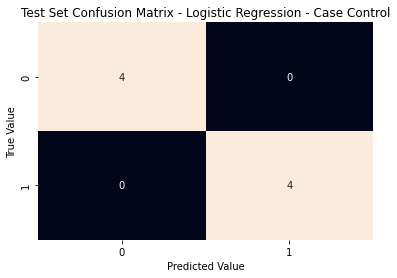

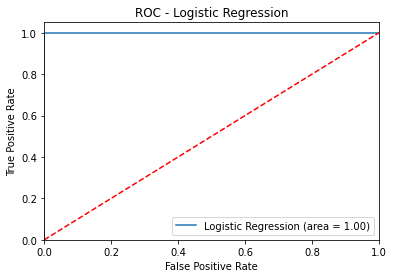

In [121]:
chunked_test_cc = split_dataset(test_instances, max_l_cc)
test_df_chunked_cc = pd.DataFrame(chunked_test_cc).T
x_test_cc = test_df_chunked_cc.iloc[:,1:]
y_labels_test_cc = test_df_chunked_cc.iloc[:, 0]
y_test_cc = []
x_test_cc = x_test_cc[best_features_cc]
for n, row in y_labels_test_cc.iteritems():
    if "bending" in row:
        y_labels_test_cc.at[n] = int(1)
        y_test_cc.append(1)
    else:
        y_labels_test_cc.at[n] = int(0)
        y_test_cc.append(0)
y_test_cc = pd.to_numeric(y_test_cc)

random_sampler = RandomUnderSampler()
x_sample_test_cc, y_sample_test_cc = random_sampler.fit_resample(x_test_cc, y_test_cc)


y_pred_im_cc = logistic_regression.predict(x_sample_test_cc)

conf_mat = confusion_matrix(y_sample_test_cc, y_pred_im_cc)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Set Confusion Matrix - Logistic Regression - Case Control')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_sample_test_cc, y_pred_im_cc)
fp_rate, tp_rate, thresholds = roc_curve(y_sample_test_cc, y_pred_im_cc)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### 4b - Binary Classification using L1-penalized regression

In [44]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score = 0
max_l = 0
n_features = 0
best_features = None
c_val = 0

selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = []
    for n, row in y_labels.iteritems():
        if "bending" in row:
            y_labels.at[n] = int(1)
            y_train.append(1)
        else:
            y_labels.at[n] = int(0)
            y_train.append(0)
    y_train = pd.to_numeric(y_train)
    
    #normalization
    scalar = StandardScaler()
    x_train  = scalar.fit_transform(x_train)
    
    logistic_regression = LogisticRegressionCV(penalty = 'l1', cv=StratifiedKFold(5), solver='liblinear')
    logistic_regression.fit(x_train, y_train)
    cv_score = cross_val_score(logistic_regression, x_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > max_cv_score:
        max_cv_score = mean_score
        max_l = i
        c_val = logistic_regression.C_[0]
print(f'The best value for L is {max_l}')
print(f'The best cross validation score is {max_cv_score}')
print(f'Optimal CV: {c_val}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
The best value for L is 7
The best cross validation score is 0.9714285714285715
Optimal CV: 0.3593813663804626


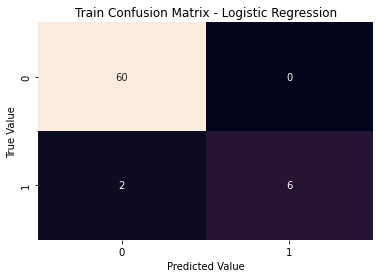

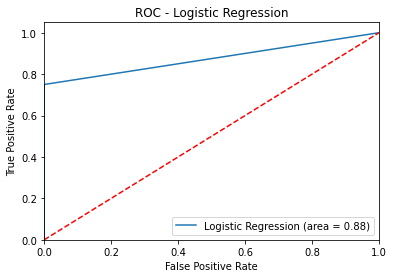

In [49]:
chunked_training = split_dataset(instances, max_l)
train_df_chunked = pd.DataFrame(chunked_training).T

train_df_cols = []
for f in selective_features:
    for col in train_df_chunked.columns:
        if f in col:
            train_df_cols.append(col)

x_train = train_df_chunked.iloc[:,1:]
y_labels = train_df_chunked.iloc[:, 0]

x_train = x_train[train_df_cols]

y_train = []
for n, row in y_labels.iteritems():
    if "bending" in row:
        y_labels.at[n] = int(1)
        y_train.append(1)
    else:
        y_labels.at[n] = int(0)
        y_train.append(0)
y_train = pd.to_numeric(y_train)

#normalization
scalar = StandardScaler()
x_train  = scalar.fit_transform(x_train)

logistic_regression = LogisticRegressionCV(penalty = 'l1', cv=StratifiedKFold(5), solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_train)

conf_mat = confusion_matrix(y_train, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_train, y_pred)
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



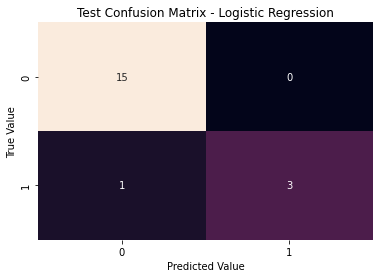

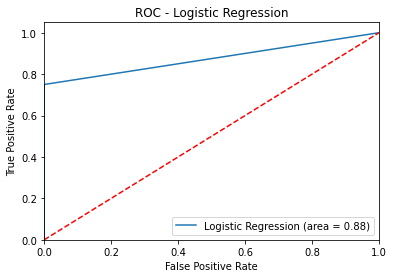

In [51]:
chunked_testing = split_dataset(test_instances, max_l)
test_df_chunked = pd.DataFrame(chunked_testing).T

test_df_cols = []
for f in selective_features:
    for col in test_df_chunked.columns:
        if f in col:
            test_df_cols.append(col)

x_test = test_df_chunked.iloc[:,1:]
y_labels = test_df_chunked.iloc[:, 0]

x_test = x_test[test_df_cols]

y_test = []
for n, row in y_labels.iteritems():
    if "bending" in row:
        y_labels.at[n] = int(1)
        y_test.append(1)
    else:
        y_labels.at[n] = int(0)
        y_test.append(0)
y_test = pd.to_numeric(y_test)

#normalization
scalar = StandardScaler()
x_test  = scalar.fit_transform(x_test)


y_pred = logistic_regression.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



### 4B II
The variable selection with p values is better than the L1 penalized regression. The L1 penalized selection is easier to implement since we are not finding out most important features and then training per fold. It is faster at the cost of accuracy.

## 4C - Multiclass Classification

In [73]:
columns = ['bending1', 'bending2','cycling','lying', 'sitting', 'standing', 'walking']

In [71]:
def multiclass_roc(y_true, y_pred):
    multi_class_labels = ['bending1', 'bending2','cycling', 'lying','sitting', 'standing', 'walking']
    lw=2
    fpr = tpr = roc_auc = dict()
    colors = ['purple','brown','blue','green','yellow','orange','red']
    # Individiually get the curve per class
    for i in range(0,7):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i],
             lw=lw, label=f'ROC curve for {multi_class_labels[i]} (area = %0.2f)' %roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [62]:
train_labeled_instances = split_dataset_by_label(df_train)
print(train_labeled_instances)


{'# Task: cycling':        Time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      32.00       4.85      17.50       3.35      22.50       3.20   
1       250      40.50       1.12      14.00       2.24      21.75       1.30   
2       500      40.50       2.60      11.33       4.50      18.25       5.31   
3       750      34.50       1.50      20.67       2.87      19.00       2.83   
4      1000      34.50       1.50      21.25       3.27      18.25       4.38   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      35.00       3.00      21.50       2.50      15.75       7.76   
476  119000      40.25       2.49      19.75       3.27      21.50       2.29   
477  119250      41.50       0.87      12.75       4.44      17.75       2.38   
478  119500      33.33       6.18      15.50       3.77      17.00       4.32   
479  119750      34.00       2.12      24.50       1.80      22.25       2.59   

       

In [94]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score = 0
max_l = 0
n_features = 0
best_features = None
c_val = 0

selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = y_labels
    
    for idx, label in enumerate(y_train):
        y_train[idx] = label.split('/')[0]
    
    #normalization
    scalar = StandardScaler()
    x_train  = scalar.fit_transform(x_train)
    
    logistic_regression = LogisticRegressionCV(penalty = 'l1', multi_class = 'multinomial', cv=3, solver='saga')
    logistic_regression.fit(x_train, y_train)
    cv_score = cross_val_score(logistic_regression, x_train, y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > max_cv_score:
        max_cv_score = mean_score
        max_l = i
        c_val = logistic_regression.C_[0]
print(f'The best value for L is {max_l}')
print(f'The best cross validation score is {max_cv_score}')
print(f'Optimal CV: {c_val}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
The best value for L is 1
The best cross validation score is 0.896574440052701
Optimal CV: 2.782559402207126


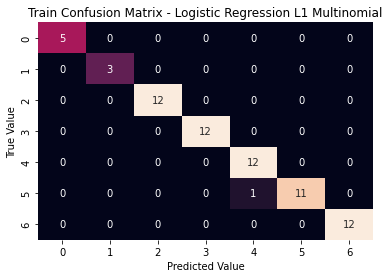

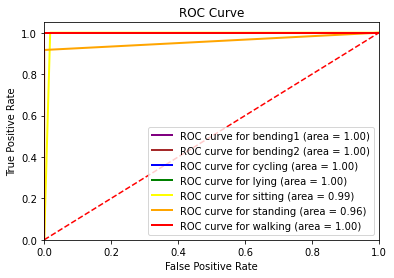

In [99]:
chunked_training = split_dataset(instances, max_l)
train_df_chunked = pd.DataFrame(chunked_training).T
train_df_cols = []
for f in selective_features:
    for col in train_df_chunked.columns:
        if f in col:
            train_df_cols.append(col)
y_labels = train_df_chunked.iloc[:, 0]
train_df_chunked = train_df_chunked[train_df_cols]
x_train = train_df_chunked.iloc[:,1:]
y_train = y_labels

for idx, label in enumerate(y_train):
    y_train[idx] = label.split('/')[0]

#normalization
scalar = StandardScaler()
x_train  = scalar.fit_transform(x_train)

logistic_regression = LogisticRegressionCV(penalty = 'l1', multi_class = 'multinomial', cv=3, solver='saga')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_train)

conf_mat = confusion_matrix(y_train, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix - Logistic Regression L1 Multinomial')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_train = label_binarize(y_train, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_train, y_pred)




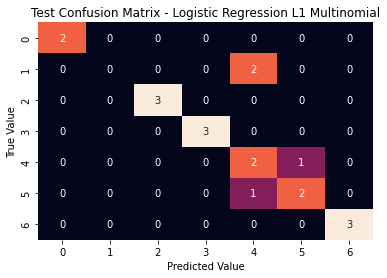

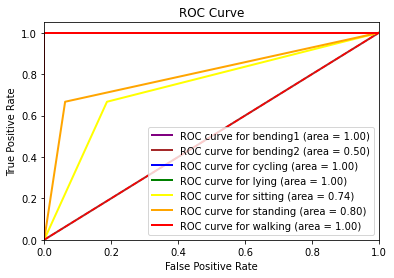

In [100]:
chunked_testing = split_dataset(test_instances, max_l)
test_df_chunked = pd.DataFrame(chunked_testing).T
test_df_cols = []
for f in selective_features:
    for col in test_df_chunked.columns:
        if f in col:
            test_df_cols.append(col)
y_labels = test_df_chunked.iloc[:, 0]
test_df_chunked = test_df_chunked[test_df_cols]
x_test = test_df_chunked.iloc[:,1:]
y_test = y_labels

for idx, label in enumerate(y_test):
    y_test[idx] = label.split('/')[0]

#normalization
scalar = StandardScaler()
x_test  = scalar.fit_transform(x_test)


y_pred = logistic_regression.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Confusion Matrix - Logistic Regression L1 Multinomial')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_test = label_binarize(y_test, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_test, y_pred)




## 4ii - Naive Bayes

In [82]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score = 0
max_l = 0


selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = y_labels
    
    for idx, label in enumerate(y_train):
        y_train[idx] = label.split('/')[0]
    
    naive_bayes_gaussian_prior = GaussianNB()
    naive_bayes_gaussian_prior.fit(x_train, y_train)

    cv_score = cross_val_score(naive_bayes_gaussian_prior, x_train, y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > max_cv_score:
        max_cv_score = mean_score
        max_l = i
print(f'The best value for L is {max_l}')
print(f'The best cross validation score is {max_cv_score}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
The best value for L is 1
The best cross validation score is 0.8096179183135704


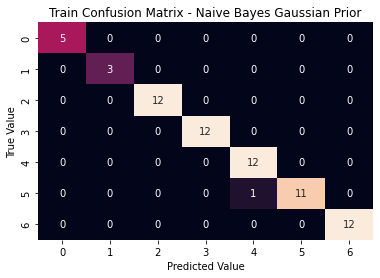

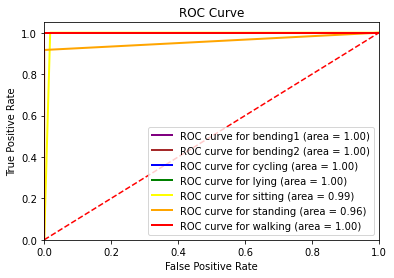

In [122]:
chunked_training = split_dataset(instances, max_l)
train_df_chunked = pd.DataFrame(chunked_training).T
train_df_cols = []
for f in selective_features:
    for col in train_df_chunked.columns:
        if f in col:
            train_df_cols.append(col)
y_labels = train_df_chunked.iloc[:, 0]
train_df_chunked = train_df_chunked[train_df_cols]
x_train = train_df_chunked.iloc[:,1:]
y_train = y_labels

for idx, label in enumerate(y_train):
    y_train[idx] = label.split('/')[0]

naive_bayes_gaussian_prior = GaussianNB()
naive_bayes_gaussian_prior.fit(x_train, y_train)

y_pred = naive_bayes_gaussian_prior.predict(x_train)

conf_mat = confusion_matrix(y_train, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix - Naive Bayes Gaussian Prior')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_train = label_binarize(y_train, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_train, y_pred)




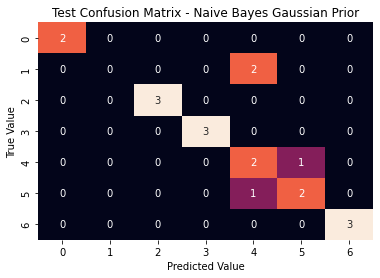

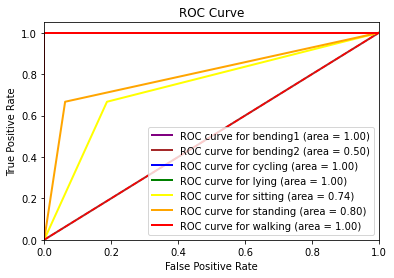

In [123]:
chunked_testing = split_dataset(test_instances, max_l)
test_df_chunked = pd.DataFrame(chunked_testing).T
test_df_cols = []
for f in selective_features:
    for col in test_df_chunked.columns:
        if f in col:
            test_df_cols.append(col)
y_labels = test_df_chunked.iloc[:, 0]
test_df_chunked = test_df_chunked[test_df_cols]
x_test = test_df_chunked.iloc[:,1:]
y_test = y_labels

for idx, label in enumerate(y_test):
    y_test[idx] = label.split('/')[0]




y_pred = naive_bayes_gaussian_prior.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Confusion Matrix - Naive Bayes Gaussian Prior')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_test = label_binarize(y_test, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_test, y_pred)




In [88]:
# Break each time series in training set to l { (1, 20) of approximately equal length

max_cv_score = 0
max_l = 0


selective_features = ['mean', 'median', 'stddev']

for i in range(1, 21):
    print(f"Running {i}")
    chunked_training = split_dataset(instances, i)
    train_df_chunked = pd.DataFrame(chunked_training).T
    train_df_cols = []
    for f in selective_features:
        for col in train_df_chunked.columns:
            if f in col:
                train_df_cols.append(col)
    y_labels = train_df_chunked.iloc[:, 0]
    train_df_chunked = train_df_chunked[train_df_cols]
    x_train = train_df_chunked.iloc[:,1:]
    y_train = y_labels
    
    for idx, label in enumerate(y_train):
        y_train[idx] = label.split('/')[0]
    
    naive_bayes_multinomial_prior = MultinomialNB()
    naive_bayes_multinomial_prior.fit(x_train, y_train)

    cv_score = cross_val_score(naive_bayes_multinomial_prior, x_train, y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > max_cv_score:
        max_cv_score = mean_score
        max_l = i
print(f'The best value for L is {max_l}')
print(f'The best cross validation score is {max_cv_score}')
        


Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
The best value for L is 2
The best cross validation score is 0.8530961791831357


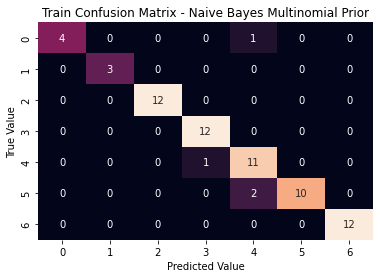

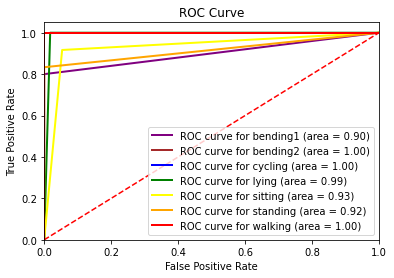

In [89]:
chunked_training = split_dataset(instances, max_l)
train_df_chunked = pd.DataFrame(chunked_training).T
train_df_cols = []
for f in selective_features:
    for col in train_df_chunked.columns:
        if f in col:
            train_df_cols.append(col)
y_labels = train_df_chunked.iloc[:, 0]
train_df_chunked = train_df_chunked[train_df_cols]
x_train = train_df_chunked.iloc[:,1:]
y_train = y_labels

for idx, label in enumerate(y_train):
    y_train[idx] = label.split('/')[0]

naive_bayes_multinomial_prior = MultinomialNB()
naive_bayes_multinomial_prior.fit(x_train, y_train)

y_pred = naive_bayes_multinomial_prior.predict(x_train)

conf_mat = confusion_matrix(y_train, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix - Naive Bayes Multinomial Prior')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_train = label_binarize(y_train, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_train, y_pred)




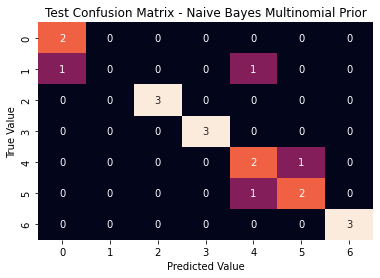

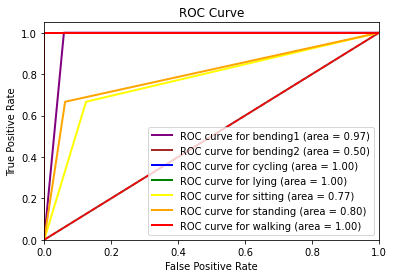

In [90]:
chunked_testing = split_dataset(test_instances, max_l)
test_df_chunked = pd.DataFrame(chunked_testing).T
test_df_cols = []
for f in selective_features:
    for col in test_df_chunked.columns:
        if f in col:
            test_df_cols.append(col)
y_labels = test_df_chunked.iloc[:, 0]
test_df_chunked = test_df_chunked[test_df_cols]
x_test = test_df_chunked.iloc[:,1:]
y_test = y_labels

for idx, label in enumerate(y_test):
    y_test[idx] = label.split('/')[0]




y_pred = naive_bayes_multinomial_prior.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax);
plt.title('Test Confusion Matrix - Naive Bayes Multinomial Prior')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

y_test = label_binarize(y_test, classes=columns)
y_pred = label_binarize(y_pred, classes=columns)
multiclass_roc(y_test, y_pred)




### 4iii - Comparisons

For multiclass classifications, we find that L1 penalized multinomial regression model performs the best among all three tested.

We find that between the Gaussian and the Bayes, the Multinomial Bayes algorithm performs better

# 3 - ISLR 4.8.3

[<img alt="#3 (click)" width="40px" src="https://github.com/DSCI-552/homework4-harshkaria/blob/main/notebook/3.jpg?raw=true" />](https://github.com/DSCI-552/homework4-harshkaria/blob/main/notebook/3.jpg?raw=true)

# 4 - ISLR 4.8.7

[<img alt="#4 (click)" width="40px" src="https://github.com/DSCI-552/homework4-harshkaria/blob/main/notebook/4.jpg?raw=true" />](https://github.com/DSCI-552/homework4-harshkaria/blob/main/notebook/4.jpg?raw=true)